In [ ]:
import pandas as pd
import yfinance as yf
from tqdm import tqdm
import time

In [7]:

buy_df = yf.download(
    tickers="AAPL",
    start="2024-01-02",
    end="2024-01-20",
    interval='1d',
    auto_adjust=True,
    progress=False,
    threads=False
)
buy_df = buy_df.dropna()
buy_df = buy_df[['Open']]
buy_price = buy_df.iloc[0,0]
print(buy_df.head())

Price             Open
Ticker            AAPL
Date                  
2024-01-02  186.033072
2024-01-03  183.120571
2024-01-04  181.062914
2024-01-05  180.903888
2024-01-08  181.003268


In [9]:
buy_df = buy_df.dropna()
buy_df = buy_df[['Open']]
buy_price = buy_df["Open"].loc["2024-01-02": "2024-01-10"].copy()
print(buy_price)

Ticker            AAPL
Date                  
2024-01-02  186.033072
2024-01-03  183.120571
2024-01-04  181.062914
2024-01-05  180.903888
2024-01-08  181.003268
2024-01-09  182.822360
2024-01-10  183.249781


In [ ]:
def backtest_value(cash):
    tickers = {
        'APO': [1, 0.1552],
        'HESAY': [1, 0.2153],
        'RHI': [0, 0.4156],
        'BBY': [0, 0.5844],
        'PM': [1, 0.2900],
        'WM': [1, 0.1720],
        'LYV': [1, 0.1675]
    }
    total_profit = 0
    for ticker, info in tqdm(tickers.items()):
        buy_df = yf.download(
            tickers=ticker,
            start="2024-01-02",
            end="2024-01-03",
            interval='1d',
            auto_adjust=True,
            progress=False,
            threads=False
        )
        buy_df = buy_df.dropna()
        buy_df = buy_df[['Open']]
        buy_price = buy_df.iloc[0,0]
        
        sell_df = yf.download(
            tickers=ticker,
            start="2025-05-02",
            end="2025-05-03",
            interval='1d',
            auto_adjust=True,
            progress=False,
            threads=False
        )
        sell_df = sell_df.dropna()
        sell_df = sell_df[['Close']]
        sell_price = sell_df.iloc[0,0]
        
        if info[0] == 1: # long
            profit = (sell_price - buy_price) * (cash * info[1] / buy_price)
            total_profit += profit
        else:
            profit = buy_price - sell_price * (cash * info[1] / buy_price)
            total_profit += profit
        
        time.sleep(2)
    return total_profit

In [ ]:
# cash = 500000
# profit = backtest_value(cash)

# print(f'Profit: {profit}')
# print(f'Gain: {profit / cash}')

100%|██████████| 7/7 [00:15<00:00,  2.16s/it]


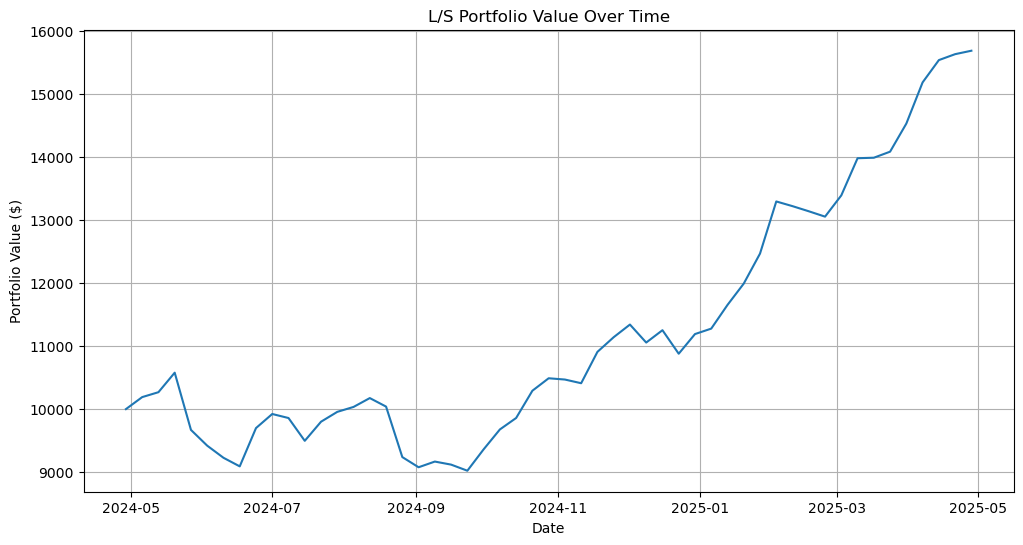

In [10]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

# Define the tickers and their positions/allocations
tickers = {
    'APO': [1, 0.1552],
    'HESAY': [1, 0.2153],
    'RHI': [0, 0.4156],
    'BBY': [0, 0.5844],
    'PM': [1, 0.2900],
    'WM': [1, 0.1720],
    'LYV': [1, 0.1675]
}

initial_cash = 10000  # Initial portfolio value

# Download historical data for all tickers
closes = []
print("Downloading historical data...")
for ticker, info in tqdm(tickers.items()):
    df = yf.download(
        ticker,
        start='2024-05-01',
        end='2025-05-04',
        interval='1wk',
        auto_adjust=True,
        progress=False,
        threads=True
    )
    if not df.empty:
        close_series = df['Close'].copy()
        close_series.name = ticker
        closes.append(close_series)
    time.sleep(2)

# Combine all closing prices into a single DataFrame
combined_df = pd.concat(closes, axis=1).ffill()

# Get initial prices (first available price for each ticker)
initial_prices = combined_df.iloc[0]

# Calculate number of shares for each position
shares = {}
for ticker, (position, allocation) in tickers.items():
    ip = initial_prices[ticker]
    shares[ticker] = (initial_cash * allocation) / ip

# Calculate daily portfolio value
portfolio_values = []
for current_date, row in combined_df.iterrows():
    daily_value = 0
    for ticker, (position, _) in tickers.items():
        price = row[ticker]
        if position == 1:  # Long position
            daily_value += shares[ticker] * price
        else:  # Short position
            daily_value += shares[ticker] * (initial_prices[ticker] - price)
    portfolio_values.append(daily_value)

# Create DataFrame and plot
portfolio_df = pd.DataFrame({
    'date': combined_df.index,
    'Portfolio Value': portfolio_values
})

plt.figure(figsize=(12, 6))
plt.plot(portfolio_df['date'], portfolio_df['Portfolio Value'])
plt.title('L/S Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.grid(True)
plt.show()

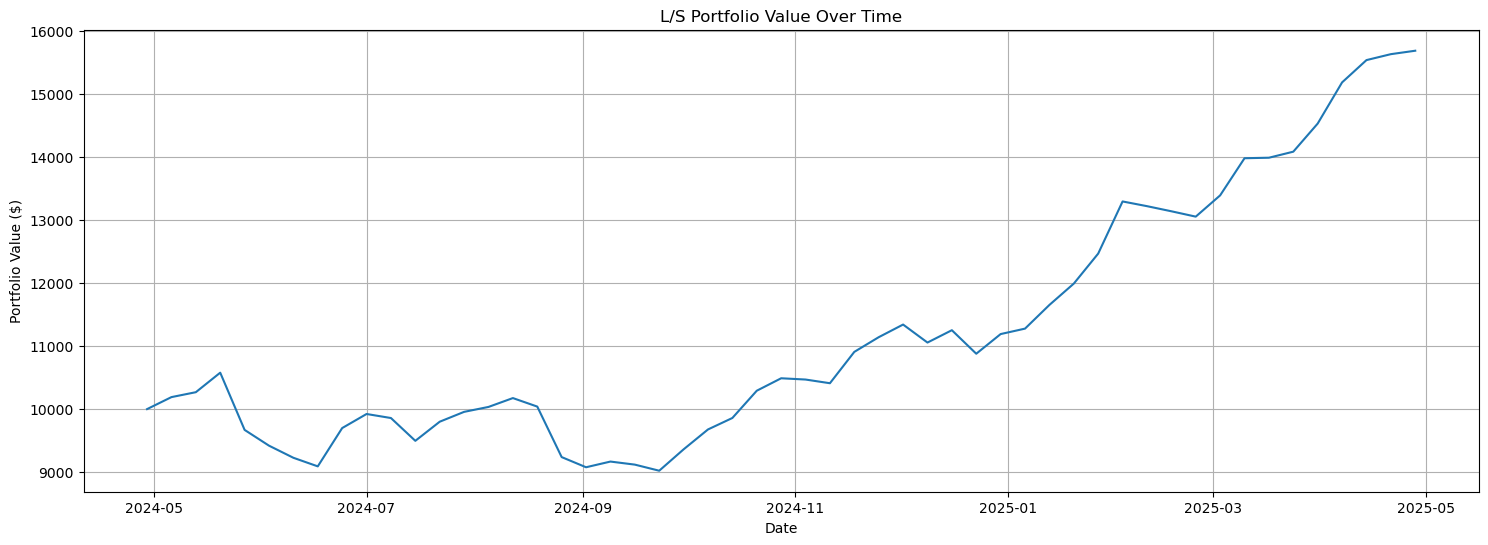

In [11]:
plt.figure(figsize=(18, 6))
plt.plot(portfolio_df['date'], portfolio_df['Portfolio Value'])
plt.title('L/S Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.grid(True)
plt.show()